In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


from sklearn import model_selection as md
from tensorflow.keras.datasets import mnist

print('Loaded.')

Loaded.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# (x_train, y_train), (x_test, y_test)
# (inp_tr, tar_tr), (inp_va, tar_va)

x_train = np.reshape(x_train,(-1,784))
x_test = np.reshape(x_test,(-1,784))

c_noise = 20

noise_tr = np.random.rand(60000, 784) * c_noise
noise_va = np.random.rand(10000, 784) * c_noise

x_train = x_train/255
x_test = x_test/255

x_train = (x_train + noise_tr)/(1 + c_noise)
x_test = (x_test + noise_va)/(1 + c_noise)

print(np.shape(x_train), np.shape(x_test))

inpT = np.concatenate((x_train, x_test))
tarT = np.concatenate((y_train, y_test))
print (np.shape(inpT))

(60000, 784) (10000, 784)
(70000, 784)


In [4]:
from sklearn.model_selection import train_test_split
inp_tr, inp_va, tar_tr, tar_va = train_test_split( inpT, tarT, test_size=0.3, random_state=0)
print (np.shape(tar_tr),np.shape(tar_va))

(49000,) (21000,)


In [5]:
pca = PCA(.5)   ## the percentage 

#n_components=700

#pca=PCA(n_components=n_components, copy=True, whiten=False, svd_solver='auto', iterated_power='auto', random_state=None)
pca.fit(inp_tr)
inp_tr_pca = pca.transform(inp_tr)
inp_va_pca = pca.transform(inp_va)

<Figure size 432x288 with 0 Axes>

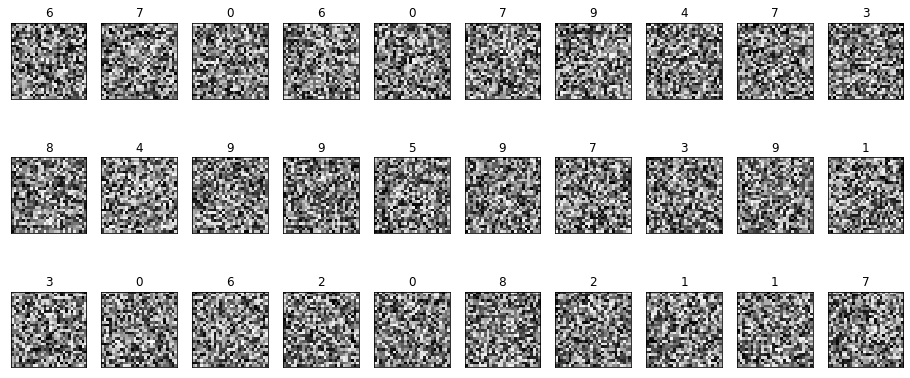

In [6]:
n1=0
n2=30

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(n1,n2):
    ax = fig.add_subplot(3,10,k1+1, title=str(int(tar_tr[k1])))
    ax.matshow(inp_tr[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l2',verbose=1)

import time
start = time.time()

# logisticRegr.fit(inp_tr, tar_tr)
# logisticRegr.predict(inp_va)

logisticRegr.fit(inp_tr_pca, tar_tr)
pred_tr= logisticRegr.predict(inp_tr_pca)
pred_va= logisticRegr.predict(inp_va_pca)

end = time.time()
time_taken = end - start
print ('Time regression: ',time_taken)

print  ('-----------------------------')

print ('Score train', logisticRegr.score(inp_tr_pca, tar_tr))
print ('Score test', logisticRegr.score(inp_va_pca,tar_va))




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Time regression:  1.3297145366668701
-----------------------------
Score train 0.22071428571428572
Score test 0.18823809523809523


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


Confusion matrix, without normalization
[[652 151 268 295 213 292 265 266 260 246]
 [198 853 371 331 276 334 313 383 353 320]
 [164 195 331 181 162 124 204 172 186 139]
 [220 257 244 443 167 269 187 213 266 204]
 [151 161 181 151 299 151 203 199 159 242]
 [ 99  64  64  96  68 102  59  62  76  61]
 [182 179 202 152 198 163 359 160 165 194]
 [176 244 187 170 258 189 186 394 188 303]
 [130 140 158 155 147 142 137 137 239 164]
 [105 141 109 143 216 134 132 203 150 253]]


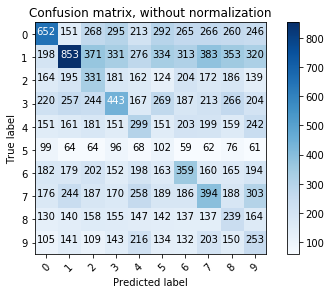

Normalized confusion matrix
[[0.22 0.05 0.09 0.1  0.07 0.1  0.09 0.09 0.09 0.08]
 [0.05 0.23 0.1  0.09 0.07 0.09 0.08 0.1  0.09 0.09]
 [0.09 0.1  0.18 0.1  0.09 0.07 0.11 0.09 0.1  0.07]
 [0.09 0.1  0.1  0.18 0.07 0.11 0.08 0.09 0.11 0.08]
 [0.08 0.08 0.1  0.08 0.16 0.08 0.11 0.1  0.08 0.13]
 [0.13 0.09 0.09 0.13 0.09 0.14 0.08 0.08 0.1  0.08]
 [0.09 0.09 0.1  0.08 0.1  0.08 0.18 0.08 0.08 0.1 ]
 [0.08 0.11 0.08 0.07 0.11 0.08 0.08 0.17 0.08 0.13]
 [0.08 0.09 0.1  0.1  0.09 0.09 0.09 0.09 0.15 0.11]
 [0.07 0.09 0.07 0.09 0.14 0.08 0.08 0.13 0.09 0.16]]


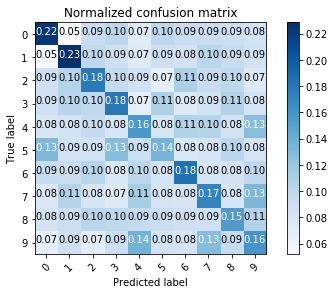

Accuracy =  0.1869047619047619


In [38]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(pred_va, tar_va)
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2','3','4','5','6','7','8','9'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2','3','4','5','6','7','8','9'], normalize=True,
                      title='Normalized confusion matrix')

#plt.show()

from sklearn import metrics

# Accuracy calculation (sum diag / sum (all))
# print ("Accuracy (TR) = ", metrics.accuracy_score(inp_tr_pca, pred_tr))
# print ("Accuracy (VA) = ", metrics.accuracy_score(inp_va_pca, pred_va))

# Manually
print ("Accuracy = ", np.sum(np.diag(cnf_matrix))/np.sum(cnf_matrix))
# print ("Accuracy (VA) = ", metrics.accuracy_score(inp_va_pca, pred_va))

